# Strategic Clustering for Establishing a Restaurant in San Francisco

## 1. Introduction

### 1.1 Background

A successful restaurant business requires a good understanding of the market. In most cases, a restaurant's locations plays a major determinant for its success. In order to maximize the business's profits, it is advantageous to determine the most strategic location for establishment.

### 1.2 Business Problem

A client seeks to establish a restaurant in the city of San Francisco where it can also be near a park so that his customers can enjoy a nice walk after their meal. In choosing a strategic location for the business's operations, the most optimal neighborhood should be found.

The objective of this capstone project is to locate the most optimal neighborhood for operation. The foundation of our reasoning would be based on the amount of registered businesses and the recreation parks that exists across each neighborhood. Foursquare API and extensive data from San Francisco Open Data 
(DataSF) will be used.

### 1.3 Target Audience

Fellow entrepreneurs seeking to either establish a new restaurant of a certain niche or have plans to expand their franchised restaurants would be very interested in the competitive advantages and business values this finding can potentially reap.

## 2. Data

In order to make a fully informed desicion, we will use different data sets in regards to our problem. Fortunately, San Francisco Open Data makes the wealth of public data generated by various San Francisco agencies and other City organizations available for public use, and Foursquare API allows for free access to some of its location and venue data.

The datasets used in this project are the following:

1. Recreation and Parks Properties

This dataset includes land owned and/or maintained by the Recreation and Parks Department. Properties are modeled within the Department's Facility Asset Management Software, TMA. Inclusive of parks, golf courses, campgrounds, etc. This dataset will help us recognize neighborhoods which are located near recreation and parks properties.

2. San Francisco Registered Business Data

This dataset includes the locations of businesses that pay taxes to the City and County of San Francisco. Each registered business may have multiple locations and each location is a single row. The Treasurer & Tax Collector’s Office collects this data through business registration applications, account update/closure forms, and taxpayer filings. This dataset is going to help us roughly gauge the foot traffic in each neighborhood of San Francisco (at least on the weekdays) by providing the number of businesses located within each neighborhood.


4. Foursquare API

Foursquare is a social networking service available for common smartphones, including the iPhone, BlackBerry and Android-powered phones. It tracks the real-time location of nearly 6 million monthly active users through apps that pay users or offer other types of rewards in exchange for access to their data. Foursquare API allows to retrieve information about the most popular spots in each neighborhood in San Francisco. This will be a good indicator of foot traffic for particular venue types. Calling the Foursquare API returns a JSON file, which can be turned into a dataframe for analysis in Python.



## 3. Methodology

In [5]:
import numpy as np # library to handle data in a vectorized manner
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Registered Business Data

In [6]:
business = pd.read_csv('https://data.sfgov.org/api/views/g8m3-pdis/rows.csv?accessType=DOWNLOAD')
print(business.shape)
business.head()


/Users/theanodimitraki/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,21,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(258870, 36)


,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,Location Start Date,Location End Date,Mail Address,Mail City,Mail Zipcode,Mail State,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,DELETE - Zip Codes,DELETE - Fire Prevention Districts,DELETE - Supervisor Districts,DELETE - Current Police Districts,DELETE - Neighborhoods,DELETE - Police Districts
0,1103593-08-161,1049564,Anjan Rajbhandari,Uber,28134 Harvey Ave,Hayward,CA,94544.0,03/24/2014,12/31/2017,03/24/2014,12/31/2017,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1218784-04-191,1100756,Luisa Alberto,High Five Sf,467 14th St,San Francisco,CA,94103.0,04/15/2019,04/15/2019,04/15/2019,04/15/2019,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,8.0,Mission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1223199-05-191,1102424,"Sunrun, Inc.","Sunrun, Inc",595 Market St,San Francisco,CA,94105.0,06/01/2008,06/01/2008,06/01/2008,06/01/2008,NaN,NaN,NaN,NaN,2200-2299,Utilities,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1220748-05-191,1101579,Felix Hernandez,Tru-Tec Electric,44 Mcaker Ct,San Mateo,CA,94403.0,05/06/2019,06/18/2019,05/06/2019,06/18/2019,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1135452-02-171,1065102,Tirta Llc,Tirta,105 Hudson St 6s,New York City,NY,10013.0,06/09/2016,12/23/2018,06/09/2016,12/23/2018,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#we pull the columns we need
business2 = business[['Business Start Date','DBA Name', 'Neighborhoods - Analysis Boundaries']].copy()

#drop null values
business3 = business2.dropna()

#convert business start date to datetime
business3['Business Start Date'] = business3['Business Start Date'].astype('datetime64[ns]') 

#we look at areas that have seen the most businesses start in the last decade.
business4 = business3.loc[business3['Business Start Date'] > '2010-01-01']

#let's also rename 'Neighborhoods - Analysis Boundaries' to just be 'Neighborhoods'
business4.rename(columns={'Neighborhoods - Analysis Boundaries': 'Neighborhood'}, inplace = True)

#we rename the column "DBA Name" to "Business Name"
business4.rename(columns={'DBA Name': 'Business Name'}, inplace = True)

business4.head()

/Users/theanodimitraki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/theanodimitraki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Business Start Date,Business Name,Neighborhood
1,2019-04-15,High Five Sf,Mission
210,2015-01-01,Erhan Ersin,Tenderloin
233,2017-05-08,2100 Rivera,Sunset/Parkside
235,2017-06-07,Kannon Goods,Nob Hill
246,2012-03-27,Robert P Moseley,Outer Richmond


In [8]:
#Count the number of businesses in each neighborhood by grouping the data
business5 = business4.groupby('Neighborhood', as_index=False).count()
business5.reset_index()
#we now get rid of the business start date, we won't be needing it anymore
business5.drop(columns = 'Business Start Date',inplace = True)
#rename our "business name" column to "Businesses" to reflect the count per neighborhood
business5.rename(columns={'Business Name': 'Businesses'}, inplace = True)
#we then sort the data
business6 = business5.sort_values(by= ['Businesses'], ascending = False).head(10)
business6.reset_index(drop=True)
business6

,Neighborhood,Businesses
5,Financial District/South Beach,12082
18,Mission,6598
33,South of Market,5699
34,Sunset/Parkside,4335
0,Bayview Hunters Point,3602
25,Outer Richmond,2888
16,Marina,2722
2,Castro/Upper Market,2654
39,West of Twin Peaks,2501
9,Hayes Valley,2497


In [9]:
#to visualize our data, we create a table with every neighborhood in SF as well as the count of registered businesses
business7 = business5.sort_values(by= ['Businesses'], ascending = False)
business7.reset_index(drop=True)
print(business7.shape)
business7

(41, 2)


,Neighborhood,Businesses
5,Financial District/South Beach,12082
18,Mission,6598
33,South of Market,5699
34,Sunset/Parkside,4335
0,Bayview Hunters Point,3602
25,Outer Richmond,2888
16,Marina,2722
2,Castro/Upper Market,2654
39,West of Twin Peaks,2501
9,Hayes Valley,2497


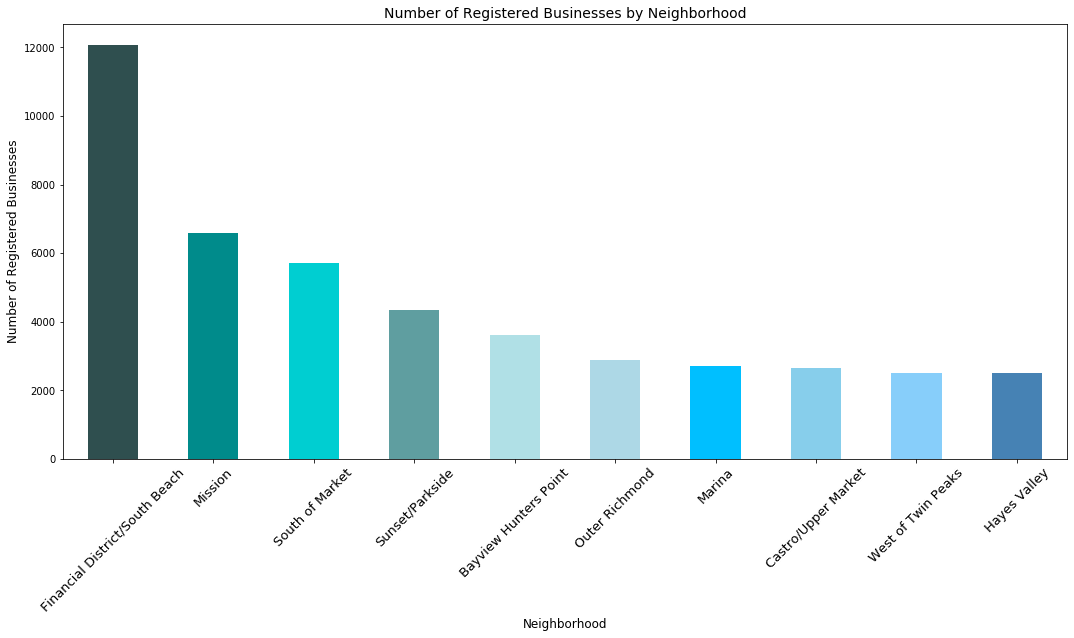

In [10]:
#we plot the neighborhoods versus the number of registered businesses to identify easier the area with the most registered businesses
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


business6.plot.bar(x = 'Neighborhood', y = 'Businesses', title = "Number of Registered Businesses by Neighborhood", legend = None, rot= 45, figsize = (18, 8), color=['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Number of Registered Businesses', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Number of Registered Businesses by Neighborhood', fontsize = 14)
plt.show()

### Recreation Parks Data

In [14]:
#import the "Recreation Parks" data
recreation = pd.read_csv('Recreation_and_Parks_Properties.csv')
print(recreation.shape)
recreation.head()

(236, 32)


,OBJECTID,Map_Label,Longitude,Latitude,Acres,TMA_PropertyID,GlobalID,created_user,created_date,last_edited_user,last_edited_date,SquareFeet,PerimeterLength,PropertyType,Address,City,State,Zipcode,Complex,PSA,SupDist,Ownership,Land_ID,GGP_Section,State_Senate,MONS_Neighborhood,Police_District,US_Congress,Realtor_Neighborhood,State_Assembly,Planning_Neighborhood,shape
0,1,Maritime Plaza,-122.399820,37.795531,2.012764,142,{C7DDE53A-9636-451E-AB81-6CD8EA8064BB},rpdgis,20130524085732,RPDGIS@RPDGIS.SFGOV.ORG,20190329212222,8.767600e+04,8.767600e+04,Civic Plaza or Square,285 Washington Street,San Francisco,CA,94111,North Beach Complex,PSA1,3,Real Estate,304.0,NaN,11th Senatorial District,Financial District,Central,12th Congressional District,Financial District/Barbary Coast,17th Assembly District,Financial District,MULTIPOLYGON (((-122.39907987164456 37.7959623...
1,3,Lake Merced Park,-122.492397,37.721923,608.486098,10,{293E53D2-335E-437A-91F0-542BA621ED4A},rpdgis,20130524085732,RPDGIS@RPDGIS.SFGOV.ORG,20190329212222,2.650565e+07,2.650565e+07,Regional Park,Lake Merced Boulevard,San Francisco,CA,94132,Lake Merced Complex,PSA4,7,PUC/Clean Water Program,806.0,NaN,11th Senatorial District,Lakeshore,Taraval,14th Congressional District,Lake Shore,19th Assembly District,Lakeshore,MULTIPOLYGON (((-122.48623678253473 37.7081573...
2,6,Broadway Tunnel West Mini Park,-122.417420,37.796422,0.148973,203,{28E5A0C5-4251-467C-B590-683B55DB2E03},rpdgis,20130524085732,RPDGIS@RPDGIS.SFGOV.ORG,20190329212223,6.489255e+03,6.489255e+03,Mini Park,1201 Broadway,San Francisco,CA,94109,North Beach Complex,PSA1,3,Public Works,621.0,NaN,11th Senatorial District,Russian Hill,Central,12th Congressional District,Nob Hill,17th Assembly District,Russian Hill,MULTIPOLYGON (((-122.41757140658545 37.7964861...
3,7,Mt. Davidson Park,-122.454658,37.739063,40.711808,69,{6E125179-0B3B-4200-916A-1C98FF73A92A},rpdgis,20130524085732,RPDGIS@RPDGIS.SFGOV.ORG,20190329212223,1.773406e+06,1.773406e+06,Regional Park,Myra Way,San Francisco,CA,94127,Lake Merced Complex,PSA4,7,Recreation & Park,121.0,NaN,11th Senatorial District,Miraloma Park,Ingleside,12th Congressional District,Miraloma Park,17th Assembly District,West of Twin Peaks,MULTIPOLYGON (((-122.45308566253199 37.7409742...
4,8,Union Square,-122.407500,37.787931,2.599709,135,{2B838818-7C4B-4841-8001-ACCB5B3B5469},rpdgis,20130524085732,RPDGIS@RPDGIS.SFGOV.ORG,20190329212223,1.132433e+05,1.132433e+05,Civic Plaza or Square,Post & Stockton,San Francisco,CA,94108,Civic Center/Potrero Hill Complex,PSA2,3,Recreation & Park,243.0,NaN,11th Senatorial District,Downtown / Union Square,Central,12th Congressional District,Downtown,17th Assembly District,Downtown/Civic Center,MULTIPOLYGON (((-122.40672169413945 37.7876472...


In [21]:
#take just the columns we need
recreation1 = recreation[['MONS_Neighborhood','Zipcode']]

#change the name of 'MONS_Neighborhood' to 'Neighborhood'
recreation1.rename(columns={'MONS_Neighborhood': 'Neighborhood'}, inplace = True)

recreation1.head(20)

,Neighborhood,Zipcode
0,Financial District,94111
1,Lakeshore,94132
2,Russian Hill,94109
3,Miraloma Park,94127
4,Downtown / Union Square,94108
5,Bernal Heights,94110
6,Crocker Amazon,94134
7,Peralta Heights,94110
8,Peralta Heights,94110
9,McLaren Park,94134


In [44]:
#count the number of crimes in each neighborhood
recreation2 = recreation1.groupby('Neighborhood', as_index=False).count()

#rename our column to reflect the number of parks in each area
recreation2.rename(columns={'Zipcode': 'Number of Parks'}, inplace = True)

#and sort our values
recreation3 = recreation2.sort_values(by= ['Number of Parks'], ascending = False)
recreation4 = recreation3.head(10)
recreation4

,Neighborhood,Number of Parks
50,Mission,11
65,Potrero Hill,8
4,Bernal Heights,8
61,Parkside,7
3,Bayview,7
69,Russian Hill,7
17,Diamond Heights,6
30,Golden Gate Park,6
29,Golden Gate Heights,6
53,Nob Hill,5


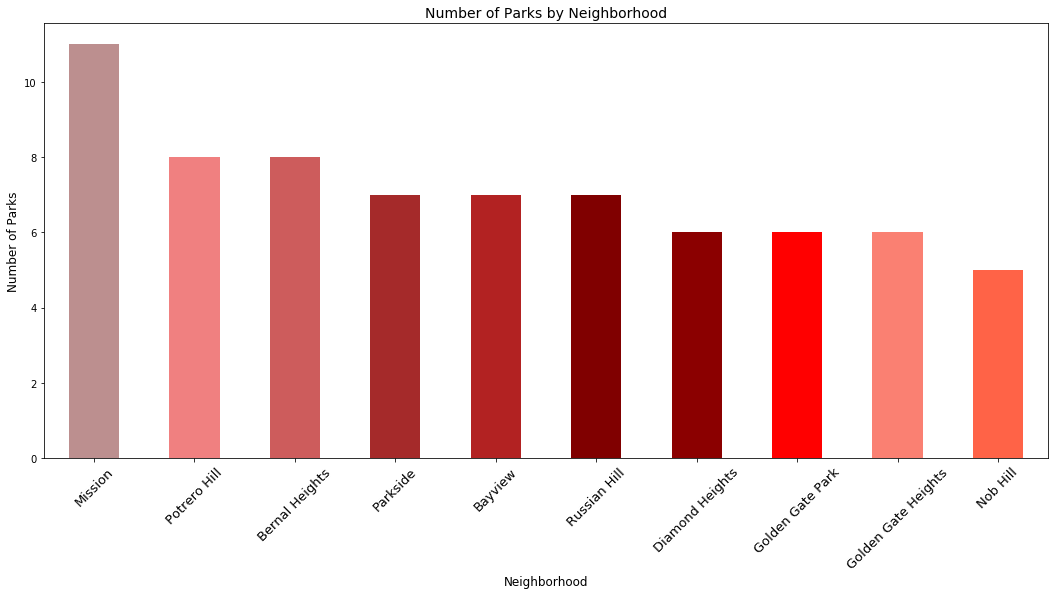

In [45]:
#we create a bar graph with the neighboorhoods versus the number of parks
recreation4.plot.bar(x = 'Neighborhood', y = 'Number of Parks', title = "Number of Parks by Neighborhood", legend = None, rot= 45, figsize = (18, 8), color=['rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'salmon', 'tomato'])
plt.ylabel('Number of Parks', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Number of Parks by Neighborhood', fontsize = 14)
plt.show()

In [49]:
#start by merging the datasets and making a new dataset that incldues the neighborhoods which wereamong the top 10 for businesses AND are amond the top 5 for crime
top1 = business7.merge(recreation4, on=['Neighborhood'])
top2 = top1[top1['Neighborhood'] != 'Golden Gate Park']
# #then take this joined dataframe and remove all common values from your list of top 10  neighborhoods for businesses
# SF_Neighborhoods = business6[(~business6.Neighborhood.isin(Overlap.Neighborhood))]
# #and what you have is the top neighborhoods for businesses that are NOT the top neighborhoods for recreation
# SF_Neighborhoods

In [50]:
top2

,Neighborhood,Businesses,Number of Parks
0,Mission,6598,11
1,Nob Hill,2479,5
2,Potrero Hill,2322,8
3,Bernal Heights,2090,8
4,Russian Hill,1626,7


In [122]:
top3 = top2
top3.loc[top3.Neighborhood == 'Mission' , 'Coordinates'] = "(37.7599, -122.4148)"
top3.loc[top3.Neighborhood == 'Nob Hill' , 'Coordinates'] = "(37.7930, -122.4161)"
top3.loc[top3.Neighborhood == 'Potrero Hill' , 'Coordinates'] = "(37.7605, -122.4009)"
top3.loc[top3.Neighborhood == 'Bernal Heights' , 'Coordinates'] = "(37.7389, -122.4152)"
top3.loc[top3.Neighborhood == 'Russian Hill' , 'Coordinates'] = "(37.8011, -122.4194)"
top3

,Neighborhood,Businesses,Number of Parks,Coordinates,Latitude,Longitude
0,Mission,6598,11,"(37.7599, -122.4148)",37.7599,122.4148
1,Nob Hill,2479,5,"(37.7930, -122.4161)",37.7930,122.4161
2,Potrero Hill,2322,8,"(37.7605, -122.4009)",37.7605,122.4009
3,Bernal Heights,2090,8,"(37.7389, -122.4152)",37.7389,122.4152
4,Russian Hill,1626,7,"(37.8011, -122.4194)",37.8011,122.4194


### Merge Data Sets

In [123]:
#we merge our data sets
top3[['Latitude','Longitude']] = top3['Coordinates'].str.strip('(').str.strip(')').str.split(', ', expand=True)
top3

,Neighborhood,Businesses,Number of Parks,Coordinates,Latitude,Longitude
0,Mission,6598,11,"(37.7599, -122.4148)",37.7599,-122.4148
1,Nob Hill,2479,5,"(37.7930, -122.4161)",37.7930,-122.4161
2,Potrero Hill,2322,8,"(37.7605, -122.4009)",37.7605,-122.4009
3,Bernal Heights,2090,8,"(37.7389, -122.4152)",37.7389,-122.4152
4,Russian Hill,1626,7,"(37.8011, -122.4194)",37.8011,-122.4194


## Foursquare Data Analysis

In [124]:
#Foursquare Credentials
CLIENT_ID = 'VNSAEY3ST2EU0Y4KGFZN4HFL2P15R5T2HMCH0TMV1WNRMAJO' # your Foursquare ID
CLIENT_SECRET = 'HFEY2LXNT2FINMSO4KLCPDEEEWWG51QMOFMUD0TZYTF45CJF' # your Foursquare Secret
VERSION = '20200629' # Foursquare API version
LIMIT = 1000000

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VNSAEY3ST2EU0Y4KGFZN4HFL2P15R5T2HMCH0TMV1WNRMAJO
CLIENT_SECRET:HFEY2LXNT2FINMSO4KLCPDEEEWWG51QMOFMUD0TZYTF45CJF


In [125]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [126]:
top3['Latitude'] = top3['Latitude'].apply(lambda x: float(x))
top3['Longitude'] = top3['Longitude'].apply(lambda x: float(x))

/Users/theanodimitraki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/theanodimitraki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
top3.Latitude[3]

37.7389

In [127]:
#we query the neighborhoods with the most traffic using Foursquare API
SF_venues = getNearbyVenues(names=top3['Neighborhood'],
                                   latitudes=top3['Latitude'],
                                   longitudes=top3['Longitude']
                                  )

Mission
Nob Hill
Potrero Hill
Bernal Heights
Russian Hill


In [129]:
#Le'ts see the shape of our dataframe
print(SF_venues.shape)
SF_venues.head()

(457, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mission,37.7599,-122.4148,Mission Cliffs,37.760654,-122.412474,Climbing Gym
1,Mission,37.7599,-122.4148,Kahnfections,37.758873,-122.415152,Bakery
2,Mission,37.7599,-122.4148,Moxie Yoga,37.758979,-122.414899,Yoga Studio
3,Mission,37.7599,-122.4148,Hit Fit SF,37.759795,-122.412651,Boxing Gym
4,Mission,37.7599,-122.4148,flour + water,37.759062,-122.412334,Italian Restaurant


In [130]:
#take a look at how many venues were pulled for each neighborhood
SF_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bernal Heights,93,93,93,93,93,93
Mission,100,100,100,100,100,100
Nob Hill,100,100,100,100,100,100
Potrero Hill,64,64,64,64,64,64
Russian Hill,100,100,100,100,100,100


In [131]:
#the number of unique types of venues pulled
print('There are {} uniques categories.'.format(len(SF_venues['Venue Category'].unique())))

There are 159 uniques categories.


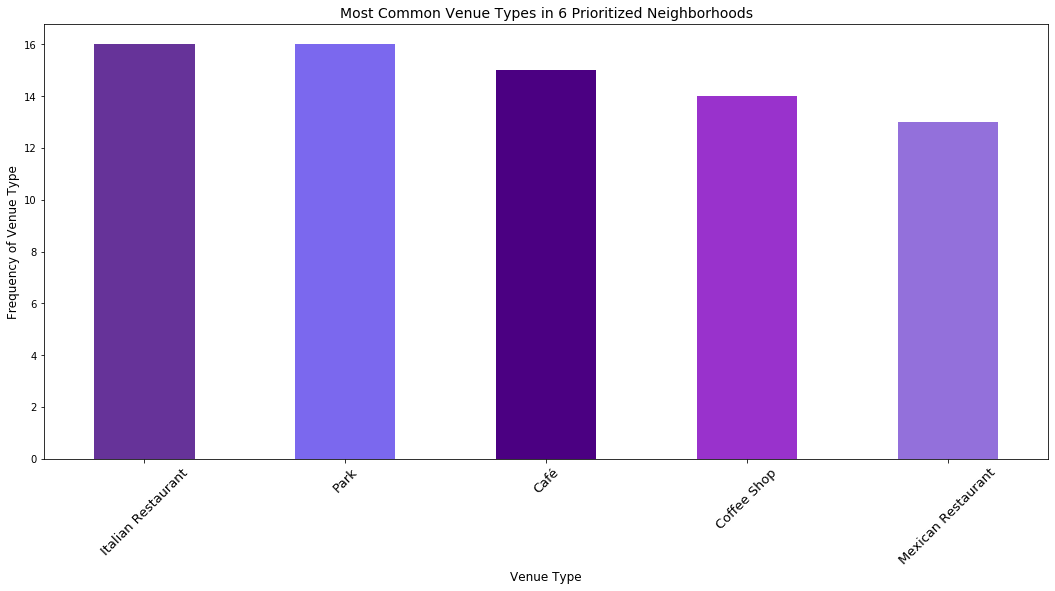

In [132]:
#to see what the most common venue categories are in our 5 selected neigborhoods
SF_top_venues = SF_venues.groupby('Venue Category', as_index = False).count().sort_values('Neighborhood', ascending = False).head(5)
SF_top_venues = SF_top_venues[['Venue Category','Neighborhood']]
SF_top_venues.rename(columns={'Neighborhood': 'Frequency'}, inplace = True)
SF_top_venues.plot.bar(x='Venue Category', y='Frequency', legend = None, title = "Most common venue types in 6 prioritized neighborhoods", rot= 45, figsize = (18, 8), color=['rebeccapurple','mediumslateblue','indigo','darkorchid','mediumpurple'])
plt.ylabel('Frequency of Venue Type', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Venue Type', fontsize=12)
plt.title('Most Common Venue Types in 6 Prioritized Neighborhoods', fontsize = 14)
plt.show()

In [133]:
# one hot encoding
SF_onehot = pd.get_dummies(SF_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SF_onehot['Neighborhood'] = SF_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SF_onehot.columns[-1]] + list(SF_onehot.columns[:-1])
SF_onehot = SF_onehot[fixed_columns]

SF_onehot.head()

,Neighborhood,Adult Boutique,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Bike Rental / Bike Share,Bike Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Stop,Business Service,Butcher,Café,Cambodian Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Farmers Market,Filipino Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Food Truck,French Restaurant,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Hill,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Music School,Music Venue,Nail Salon,National Park,New American Restaurant,Newsstand,Nightclub,Office,Outdoor Supply Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pizza Place,Playground,Plaza,Pop-Up Shop,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Smoothie Shop,South American Restaurant,Souvlaki Shop,Spa,Steakhouse,Street Art,Sushi Restaurant,Taco Place,Tennis Court,Thai Restaurant,Theater,Tour Provider,Tourist Information Center,Trade School,Trail,Trattoria/Osteria,Turkish Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio
0,Mission,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Mission,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mission,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Mission,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Mission,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
#examine shape of new dataframe
SF_onehot.shape

(457, 160)

In [135]:
#now group the data
SF_grouped = SF_onehot.groupby('Neighborhood').mean().reset_index()
print(SF_grouped.shape)
SF_grouped

(5, 160)


,Neighborhood,Adult Boutique,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Bike Rental / Bike Share,Bike Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Stop,Business Service,Butcher,Café,Cambodian Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Farmers Market,Filipino Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Food Truck,French Restaurant,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Hill,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Music School,Music Venue,Nail Salon,National Park,New American Restaurant,Newsstand,Nightclub,Office,Outdoor Supply Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pizza Place,Playground,Plaza,Pop-Up Shop,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Smoothie Shop,South American Restaurant,Souvlaki Shop,Spa,Steakhouse,Street Art,Sushi Restaurant,Taco Place,Tennis Court,Thai Restaurant,Theater,Tour Provider,Tourist Information Center,Trade School,Trail,Trattoria/Osteria,Turkish Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio
0,Bernal Heights,0.00,0.021505,0.000000,0.000000,0.021505,0.00,0.00,0.010753,0.00,0.053763,0.00,0.00,0.00,0.010753,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00000,0.010753,0.000000,0.010753,0.00,0.00,0.010753,0.010753,0.00,0.010753,0.021505,0.010753,0.010753,0.00,0.010753,0.00,0.010753,0.00,0.00,0.00,0.00,0.010753,0.032258,0.00,0.00,0.010753,0.010753,0.00,0.00,0.00,0.00,0.00,0.00000,0.00,0.00,0.000000,0.00,0.032258,0.00,0.00,0.010753,0.010753,0.043011,0.000000,0.00,0.000000,0.010753,0.00,0.010753,0.010753,0.021505,0.010753,0.010753,0.010753,0.010753,0.010753,0.00,0.000000,0.00,0.00,0.00,0.000000,0.021505,0.000000,0.010753,0.021505,0.010753,0.000000,0.00,0.00,0.021505,0.010753,0.010753,0.010753,0.00,0.00,0.00,0.00,0.00,0.010753,0.00,0.043011,0.00,0.010753,0.00,0.00,0.00,0.00,0.000000,0.00000,0.00,0.010753,0.00,0.00,0.000000,0.010753,0.043011,0.00,0.010753,0.010753,0.043011,0.032258,0.00,0.00,0.010753,0.010753,0.010753,0.000000,0.00,0.00,0.010753,0.010753,0.010753,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.010753,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.053763,0.00,0.010753,0.000000,0.00,0.00000,0.00,0.00,0.010753
1,Mission,0.01,0.010000,0.000000,0.010000,0.010000,0.00,0.02,0.010000,0.00,0.020000,0.03,0.00,0.00,0.010000,0.00,0.00,0.020000,0.00,0.01,0.02,0.000000,0.00000,0.000000,0.000000,0.010000,0.01,0.01,0.000000,0.000000,0.01,0.000000,0.050000,0.000000,0.000000,0.00,0.000000,0.01,0.010000,0.01,0.00,0.01,0.00,0.030000,0.020000,0.01,0.00,0.000000,0.000000,0.01,0.00,0.01,0.01,0.01,0.02000,0.00,0.00,0.010000,0.00,0.000000,0.01,0.00,0.000000,0.000000,0.020000,0.000000,0.01,0.000000,0.000000,0.01,0.000000,0.020000,0.000000,0.010000,0.010000,0.010000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.030000,0.00000

In [136]:
#print each neighborhood with the top 5 most common venues
num_top_venues = 5

for hood in SF_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = SF_grouped[SF_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bernal Heights----
                venue  freq
0               Trail  0.05
1              Bakery  0.05
2  Mexican Restaurant  0.04
3         Pizza Place  0.04
4                Park  0.04


----Mission----
                     venue  freq
0       Mexican Restaurant  0.06
1                     Café  0.05
2              Music Venue  0.04
3  New American Restaurant  0.04
4           Ice Cream Shop  0.03


----Nob Hill----
                venue  freq
0  Italian Restaurant  0.08
1    Sushi Restaurant  0.04
2           Pet Store  0.03
3   French Restaurant  0.03
4            Wine Bar  0.03


----Potrero Hill----
            venue  freq
0            Park  0.06
1     Coffee Shop  0.06
2            Café  0.05
3  Sandwich Place  0.05
4  Breakfast Spot  0.03


----Russian Hill----
                venue  freq
0                Park  0.06
1  Italian Restaurant  0.05
2    Sushi Restaurant  0.04
3                 Bar  0.04
4      Ice Cream Shop  0.03




In [137]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [138]:
num_top_venues = 30

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SF_grouped['Neighborhood']

for ind in np.arange(SF_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SF_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
0,Bernal Heights,Bakery,Trail,Park,Pizza Place,Food Truck,Mexican Restaurant,Farmers Market,Playground,Coffee Shop,Café,Latin American Restaurant,Indian Restaurant,Italian Restaurant,American Restaurant,Gourmet Shop,Art Gallery,Grocery Store,Cocktail Bar,New American Restaurant,Butcher,Flea Market,Flower Shop,Candy Store,Caribbean Restaurant,Miscellaneous Shop,Chinese Restaurant,Garden Center,Mediterranean Restaurant,Gay Bar,Gym
1,Mission,Mexican Restaurant,Café,Music Venue,New American Restaurant,Ice Cream Shop,Bar,Cocktail Bar,Boxing Gym,Latin American Restaurant,Performing Arts Venue,Gift Shop,Food Truck,Deli / Bodega,Coffee Shop,Yoga Studio,Bookstore,Wine Bar,Arts & Crafts Store,Theater,Bakery,Argentinian Restaurant,Marijuana Dispensary,Juice Bar,Japanese Restaurant,American Restaurant,Furniture / Home Store,Italian Restaurant,Art Gallery,Gym / Fitness Center,Market
2,Nob Hill,Italian Restaurant,Sushi Restaurant,French Restaurant,Grocery Store,Wine Bar,Vietnamese Restaurant,Bar,Pet Store,Steakhouse,Café,Gym / Fitness Center,Deli / Bodega,Hotel,Coffee Shop,Pizza Place,Yoga Studio,Park,Beer Bar,Massage Studio,Bakery,American Restaurant,Liquor Store,Marijuana Dispensary,Martial Arts Dojo,Hotel Bar,Wings Joint,Mediterranean Restaurant,Hawaiian Restaurant,Gym,Korean Restaurant
3,Potrero Hill,Coffee Shop,Park,Café,Sandwich Place,Sushi Restaurant,Brewery,Nail Salon,Deli / Bodega,Breakfast Spot,Gym / Fitness Center,Art Gallery,Grocery Store,Food Truck,Wine Shop,Mexican Restaurant,Music Venue,Peruvian Restaurant,Office,New American Restaurant,Pet Store,Yoga Studio,Convenience Store,Playground,Cosmetics Shop,Japanese Restaurant,Indie Theater,Dive Bar,Ice Cream Shop,Hill,Gym
4,Russian Hill,Park,Italian Restaurant,Bar,Sushi Restaurant,Chocolate Shop,Ice Cream Shop,Pizza Place,Playground,Coffee Shop,National Park,Korean Restaurant,Steakhouse,Bike Rental / Bike Share,Café,Tour Provider,Wine Bar,Wine Shop,Men's Store,Modern European Restaurant,Candy Store,Monument / Landmark,Lounge,Cantonese Restaurant,Diner,Liquor Store,Bubble Tea Shop,Latin American Restaurant,Yoga Studio,Cheese Shop,Newsstand


### Clustering

In [139]:
# set number of clusters
kclusters = 3

SF_grouped_clustering = SF_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SF_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 0, 1], dtype=int32)

In [ ]:
# merge SF_grouped with SF_data to add latitude/longitude for each neighborhood
top3 = top3.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [ ]:
# merge SF_grouped with SF_data to add latitude/longitude for each neighborhood
top3 = top3.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [153]:
#also including the number of bars and restaurants that each neighborhood has in its top 10 most popular spots.
top3["Bars and Restaurants"] = ""
top3.loc[top3.Neighborhood == 'Bernal Heights', 'Bars and Restaurants'] = .35
top3.loc[top3.Neighborhood == 'Mission', 'Bars and Restaurants'] = .6
top3.loc[top3.Neighborhood == 'Nob Hill', 'Bars and Restaurants'] = .6
top3.loc[top3.Neighborhood == 'Potrero Hill', 'Bars and Restaurants'] = .55
top3.loc[top3.Neighborhood == 'Russian Hill', 'Bars and Restaurants'] = .6
top3['Bars and Restaurants'].astype(int)

0    0
1    0
2    0
3    0
4    0
Name: Bars and Restaurants, dtype: int64

In [154]:
top3['Latitude'] = top3['Latitude'].astype(float)
top3['Longitude'] = top3['Longitude'].astype(float)
top3['Cluster Labels'] = top3['Cluster Labels'].astype(int)


top3

,Neighborhood,Businesses,Number of Parks,Coordinates,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,Bars and Restaurants
0,Mission,6598,11,"(37.7599, -122.4148)",37.7599,-122.4148,2,Mexican Restaurant,Café,Music Venue,New American Restaurant,Ice Cream Shop,Bar,Cocktail Bar,Boxing Gym,Latin American Restaurant,Performing Arts Venue,Gift Shop,Food Truck,Deli / Bodega,Coffee Shop,Yoga Studio,Bookstore,Wine Bar,Arts & Crafts Store,Theater,Bakery,Argentinian Restaurant,Marijuana Dispensary,Juice Bar,Japanese Restaurant,American Restaurant,Furniture / Home Store,Italian Restaurant,Art Gallery,Gym / Fitness Center,Market,0.6
1,Nob Hill,2479,5,"(37.7930, -122.4161)",37.7930,-122.4161,1,Italian Restaurant,Sushi Restaurant,French Restaurant,Grocery Store,Wine Bar,Vietnamese Restaurant,Bar,Pet Store,Steakhouse,Café,Gym / Fitness Center,Deli / Bodega,Hotel,Coffee Shop,Pizza Place,Yoga Studio,Park,Beer Bar,Massage Studio,Bakery,American Restaurant,Liquor Store,Marijuana Dispensary,Martial Arts Dojo,Hotel Bar,Wings Joint,Mediterranean Restaurant,Hawaiian Restaurant,Gym,Korean Restaurant,0.6
2,Potrero Hill,2322,8,"(37.7605, -122.4009)",37.7605,-122.4009,0,Coffee Shop,Park,Café,Sandwich Place,Sushi Restaurant,Brewery,Nail Salon,Deli / Bodega,Breakfast Spot,Gym / Fitness Center,Art Gallery,Grocery Store,Food Truck,Wine Shop,Mexican Restaurant,Music Venue,Peruvian Restaurant,Office,New American Restaurant,Pet Store,Yoga Studio,Convenience Store,Playground,Cosmetics Shop,Japanese Restaurant,Indie Theater,Dive Bar,Ice Cream Shop,Hill,Gym,0.55
3,Bernal Heights,2090,8,"(37.7389, -122.4152)",37.7389,-122.4152,0,Bakery,Trail,Park,Pizza Place,Food Truck,Mexican Restaurant,Farmers Market,Playground,Coffee Shop,Café,Latin American Restaurant,Indian Restaurant,Italian Restaurant,American Restaurant,Gourmet Shop,Art Gallery,Grocery Store,Cocktail Bar,New American Restaurant,Butcher,Flea Market,Flower Shop,Candy Store,Caribbean Restaurant,Miscellaneous Shop,Chinese Restaurant,Garden Center,Mediterranean Restaurant,Gay Bar,Gym,0.35
4,Russian Hill,1626,7,"(37.8011, -122.4194)",37.8011,-122.4194,1,Park,Italian Restaurant,Bar,Sushi Restaurant,Chocolate Shop,Ice Cream Shop,Pizza Place,Playground,Coffee Shop,National Park,Korean Restaurant,Steakhouse,Bike Rental / Bike Share,Café,Tour Provider,Wine Bar,Wine Shop,Men's Store,Modern European Restaurant,Candy Store,Monument / Landmark,Lounge,Cantonese Restaurant,Diner,Liquor Store,Bubble Tea Shop,Latin American Restaurant,Yoga Studio,Cheese Shop,Newsstand,0.6


/Users/theanodimitraki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/Users/theanodimitraki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


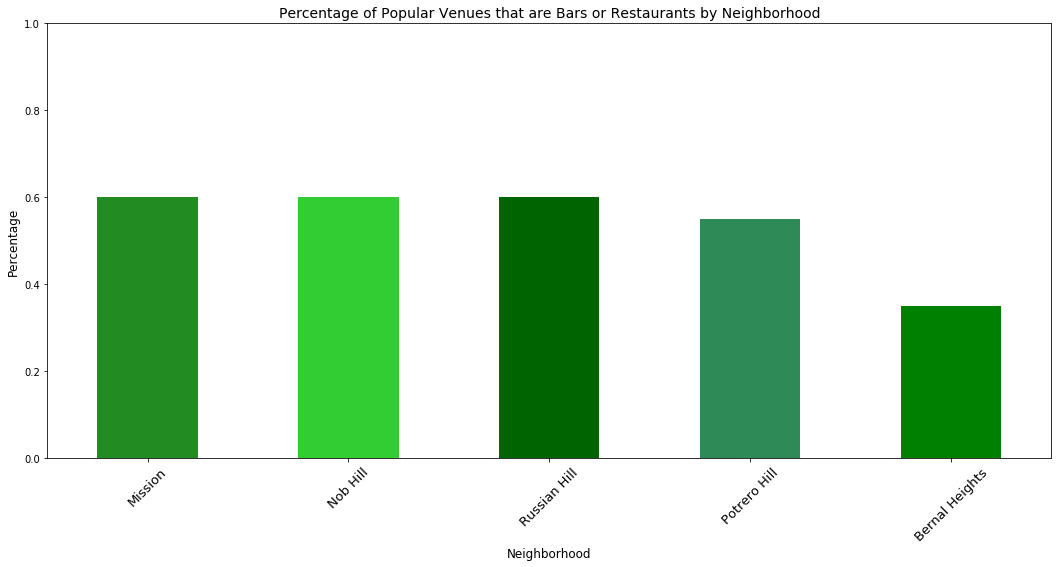

In [156]:
#let's visualize the percentage of popular venues in each neighborhood
top3_rb = top3[['Neighborhood','Bars and Restaurants']]
top3_rb.rename(columns={'Bars and Restaurants': 'Frequency'}, inplace = True)
top3_rb.sort_values('Frequency', inplace = True, ascending = False)
top3_rb.plot.bar(x='Neighborhood',y ='Frequency', rot = 45, figsize = (18, 8), legend = None, color = ['forestgreen','limegreen','darkgreen','seagreen','green','mediumseagreen'])
plt.ylabel('Percentage', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylim(0,1)
plt.title('Percentage of Popular Venues that are Bars or Restaurants by Neighborhood', fontsize = 14)
plt.show()

### Map Clustered Neighborhoods

In [157]:
address = 'San Francisco, California'

geolocator = Nominatim(user_agent="SF_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7790262, -122.4199061.


In [160]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(.7, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# # add markers to the map
markers_colors = []
for lat, lon, poi, cluster, bars in zip(top3['Latitude'], top3['Longitude'], top3['Neighborhood'], top3['Cluster Labels'], top3['Bars and Restaurants']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=35*bars,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

Cluster 0: 
HIGH Number of Recreation and Parks
MID Number of Businesses

Cluster 1:
LOW Number of Recreation and Parks
MID Number of Businesses

Cluster 2:
HIGH Number of Recreation and Parks
HIGH Number of Businesses

## 4. Results

In summary, Cluster 2, possess the highest amount of recreation and parks, as well as the highest amount of registered businesses. It is most suitable area for someone who is looking to have constant foot traffic and is interested in locating his/her business near a park where people can enjoy the views, as well as enjoy a walk before or after their meal. Cluster 0, would be the second area that we would investigate for opening the new restaurant.

## 5. Conclusion

In this study, I have labeled the neighborhoods corresponding to their characteristics - registered businesses, recreation and parks, popular venues. The most promising group of neighborhoods for opening a restaurant with a close vicinity to a park, appears to be 'Cluster 2'.

Our Client could more specifically consider Mission as a location of establishment for optimal results. However, whenever there is a shift in the dynamic of business demands, we could always target different clusters of neighborhoods. Case in point, if the client has plans to expand a well-established franchised restaurant, neighbourhoods in ‘Cluster 0’ would be the optimal location; this is under the assumption that the aforementioned restaurant would have a competitive advantage of brand loyalty against the high number of restaurant businesses in that neighbourhood.

In conclusion, the extensive analysis above would greatly increase the likelihood of the restaurant’s success. Similarly, we can use this project to analyze interchangeable scenarios, such as opening a restaurant near different popular locations.

## 6. Future Directions

The model could use more improvements in capturing a restaurants’ individual traits. For example, we could analyze the number of competitors, spending power, or the percentage of target customers. More data, especially data of different types, would help improve model performances significantly.

## References

- City and County of San Francisco. (2020, July 02). Registered Business Locations - San Francisco: DataSF: City and County of San Francisco. Retrieved from https://data.sfgov.org/Economy-and-Community/Registered-Business-Locations-San-Francisco/g8m3-pdis

- City and County of San Francisco. (2020, July 02). Registered Business Locations - San Francisco: DataSF: City and County of San Francisco. Retrieved from https://data.sfgov.org/Economy-and-Community/Registered-Business-Locations-San-Francisco/g8m3-pdis


- Foursquare Developer API: https://developer.foursquare.com